# Assignment 1:  SLIC Superpixels.


----------------------------

In this assignment, you will learn about superpixels. You will first generate superpixels by clustering pixels via k-means. This will generate a superpixel map such as the following:

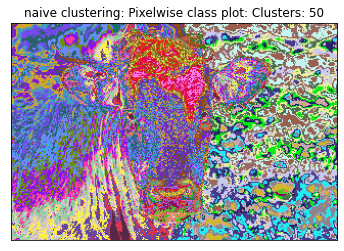

You will make some adjustments to your k-means clustering. After reflection, you will then implement a better superpixel algorithm: SLIC, which lets you generate superpixel maps like the following:

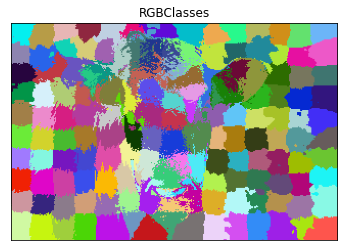

## Data

First, we download the MSRC labeled imaged database.

In [ ]:
!wget http://download.microsoft.com/download/A/1/1/A116CD80-5B79-407E-B5CE-3D5C6ED8B0D5/msrc_objcategimagedatabase_v1.zip
!unzip --qq msrc_objcategimagedatabase_v1.zip

--2021-10-12 14:32:44--  http://download.microsoft.com/download/A/1/1/A116CD80-5B79-407E-B5CE-3D5C6ED8B0D5/msrc_objcategimagedatabase_v1.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.236.109, 2a02:26f0:e600:58d::e59, 2a02:26f0:e600:588::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.35.236.109|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44119839 (42M) [application/octet-stream]
Saving to: ‘msrc_objcategimagedatabase_v1.zip’

msrc_objcategimaged 100%[===================>]  42.08M   132MB/s    in 0.3s    

2021-10-12 14:32:44 (132 MB/s) - ‘msrc_objcategimagedatabase_v1.zip’ saved [44119839/44119839]



For this assignment, we will only use the following images. We define the list below as `im_list`.

In [ ]:
im_list = ['MSRC_ObjCategImageDatabase_v1/1_22_s.bmp',
           'MSRC_ObjCategImageDatabase_v1/1_27_s.bmp',
           'MSRC_ObjCategImageDatabase_v1/3_3_s.bmp',
           'MSRC_ObjCategImageDatabase_v1/3_6_s.bmp',
           'MSRC_ObjCategImageDatabase_v1/6_5_s.bmp',
           'MSRC_ObjCategImageDatabase_v1/7_19_s.bmp']

 We provide the following functions as helpers for plotting your results. Please pay attention to their signatures and outputs.





In [ ]:
#All important functions to plot
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_image(im,title,xticks=[],yticks= [],isCv2 = True):
    """
    im :Image to plot
    title : Title of image 
    xticks : List of tick values. Defaults to nothing
    yticks :List of tick values. Defaults to nothing 
    cv2 : Is the image cv2 image? cv2 images are BGR instead of RGB. Default True
    """
    plt.figure()
    if isCv2:
        im = im[:,:,::-1]
    plt.imshow(im)
    plt.title(title)
    plt.xticks(xticks)
    plt.yticks(yticks)

def superpixel_plot(im,seg,title = "Superpixels"):
    """
    Given an image (nXmX3) and pixelwise class mat (nXm), 
    1. Consider each class as a superpixel
    2. Calculate mean superpixel value for each class
    3. Replace the RGB value of each pixel in a class with the mean value  
    
    Inputs:
    im: Input image
    seg: Segmentation map
    title: Title of the plot 
    
    Output: None
    Creates a plot    
    """
    clust = np.unique(seg)
    mapper_dict = {i: im[seg == i].mean(axis = 0)/255. for i in clust}

    seg_img =  np.zeros((seg.shape[0],seg.shape[1],3))
    for i in clust:
        seg_img[seg == i] = mapper_dict[i]
    
    plot_image(seg_img,title)
    
    return    

def rgb_segment(seg,n = None,plot = True,title=None,legend = True,color = None):
    """
    Given a segmentation map, get the plot of the classes
    """
    clust = np.unique(seg)
    if n is None:
        n = len(clust)
    if color is None:
        cm = plt.cm.get_cmap('hsv',n+1)
        # mapper_dict = {i:np.array(cm(i/n)) for i in clust}
        mapper_dict = {i:np.random.rand(3,) for i in clust} 
    #elif color == 'mean':
        #TODO..get the mean color of cluster center and assign that to mapper_dict

    seg_img =  np.zeros((seg.shape[0],seg.shape[1],3))
    for i in clust:
        seg_img[seg == i] = mapper_dict[i][:3]

    if plot: 
        plot_image(seg_img,title = title)
    if legend:
        # get the colors of the values, according to the 
        # colormap used by imshow
        patches = [ mpatches.Patch(color=mapper_dict[i], label=" : {l}".format(l=i) ) for i in range(n) ]
        # put those patched as legend-handles into the legend
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
        plt.grid(True)
        plt.show()

    return seg_img

For example, the following code uses `plot_image` to plot the 6 images we are using for this assignment.

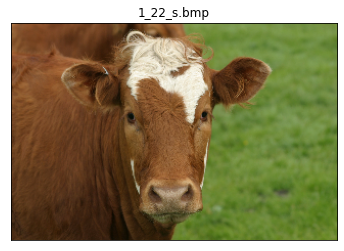

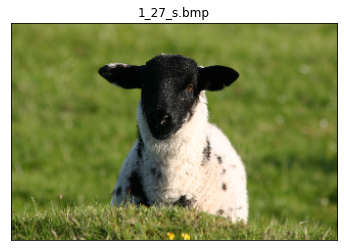

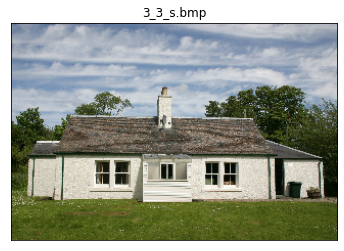

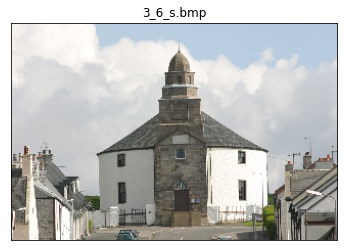

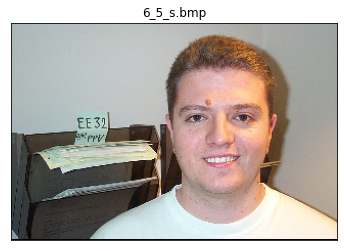

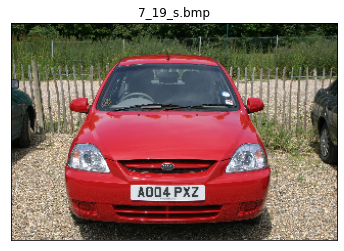

In [ ]:
for i in im_list:
    plot_image(cv2.imread(i),i.split("/")[-1])

## Part 1: K-means on Image Pixels

For this portion of the assignment, you will attempt to identify superpixels by using k-means with various attributes of the image's pixels as inputs (r, g, b, and/or x, y).

### Question 1: Perform k-means on image pixels `(r, g, b)`. (20 points)
 
The k-means clustering algorithm is an unsupervised algorithm which, for some items and for some specified number of clusters represented by cluster centers, minimizes the distance between items and their associated cluster centers. It does so by iteratively assigning items to a cluster and recomputing the cluster center based on the assigned items.

Complete the pixel clustering function. It should take input an image (shape = `(n, m, 3)`) and number of clusters. Each pixel should be represented by a vector with 3 values: `(r, g, b)`.

Then, let our provided code plot the pixelwise and superpixel plots for the cow image (`1_22_s.bmp`), using your `cluster_pixels` implementation with the provided values for the number of clusters: `5, 10, 50`.




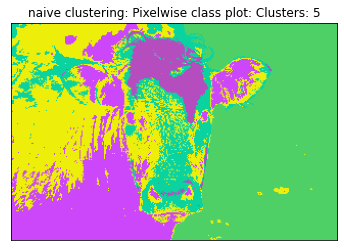

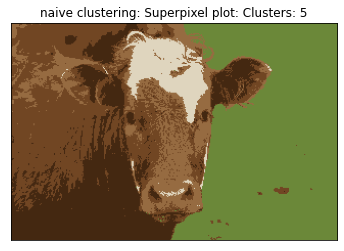

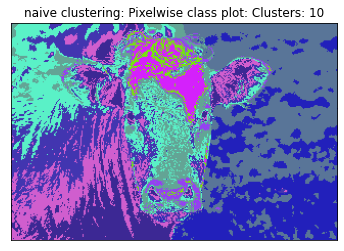

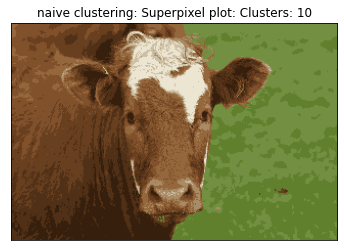

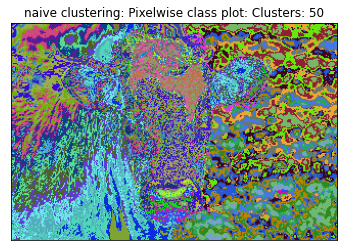

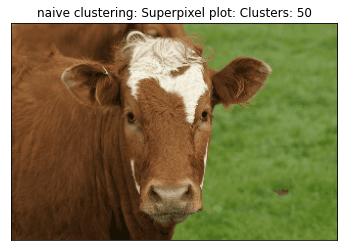

In [ ]:
from sklearn.cluster import KMeans
import cv2
import numpy as np


def cluster_pixels(im,k):    
    #TODO Pixelwise clustering   
    h, w, c = im.shape
    im = im.reshape(h*w, c)
    kmeans_cluster = KMeans(n_clusters=k)
    kmeans_cluster.fit(im)
    # cluster_centers = kmeans_cluster.cluster_centers_
    cluster_labels = kmeans_cluster.labels_
    return cluster_labels.reshape(h, w)


for k in [5,10,50]:
    org_img = cv2.imread(im_list[0])
    img = org_img/255 # scaling
    clusters = cluster_pixels(img,k)
    _ = rgb_segment(clusters,n = k, title =  "naive clustering: Pixelwise class plot: Clusters: " + str(k),legend = False)
    superpixel_plot(org_img,clusters,title =  "naive clustering: Superpixel plot: Clusters: "+ str(k))

### Question 2: Perform k-means on image pixels `(r, g, b, x, y)`. (10 points)
New Section
Instead of the clustering running on (r,g,b) values, run the clustering on (r,b,g,x,y).

Try with clusters = `5,10,25,50,150`. You only need to plot the cow (`1_22_s.bmp`).
____

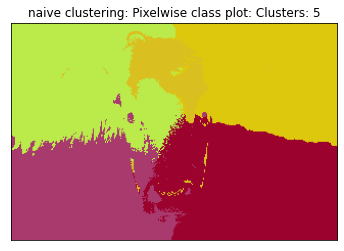

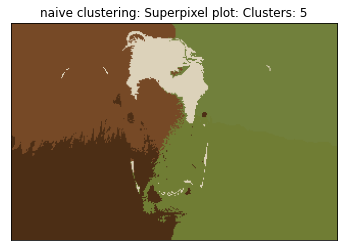

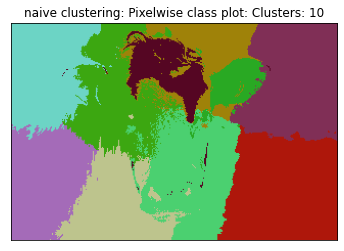

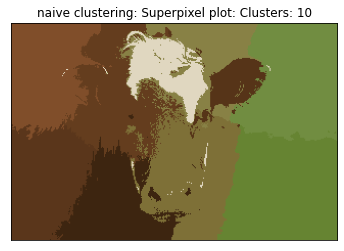

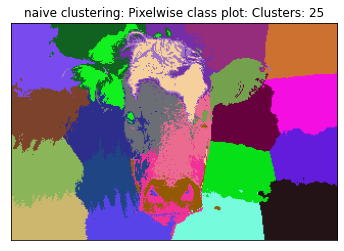

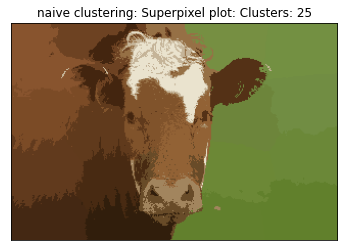

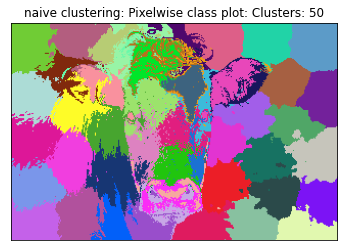

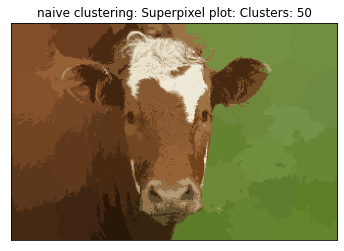

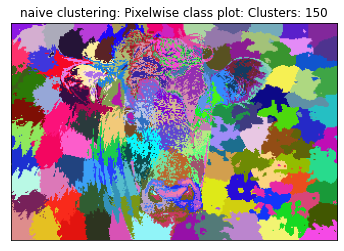

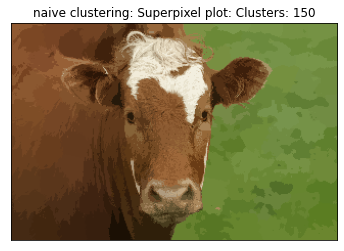

In [ ]:
#TODO: clustering r,b,g,x,y values 

def preprocess(im):
    """
    Converts the 3 channel image (RGB) to 5 channel image (XYRGB)
    """
    new_im = np.zeros((im.shape[0], im.shape[1], im.shape[2]+2))
    for i in range(new_im.shape[0]):
      for j in range(new_im.shape[1]):
        new_im[i,j] = np.array([i, j, im[i,j][0], im[i,j][1], im[i,j][2]])

    return new_im

def cluster_rgbxy(img,k):
    """
    Given image im and asked for k clusters, return nXm size 2D array
    segmap[0,0] is the class of pixel im[0,0,:]
    """
    h, w, c = img.shape
    img = img.reshape(h*w, c)
    kmeans_cluster = KMeans(n_clusters=k)
    kmeans_cluster.fit(img)
    # cluster_centers = kmeans_cluster.cluster_centers_
    cluster_labels = kmeans_cluster.labels_
    return cluster_labels.reshape(h, w)

for k in [5, 10, 25, 50, 150]:
    org_img = cv2.imread(im_list[0])
    img = preprocess(org_img)

    # Scaling all 5 channels with 255 even if x,y values are bigger because it doesnot affect the results much
    img = img/255 
    clusters = cluster_rgbxy(img,k)
    _ = rgb_segment(clusters, n = k, title =  "naive clustering: Pixelwise class plot: Clusters: " + str(k),legend = False)
    superpixel_plot(org_img, clusters, title =  "naive clustering: Superpixel plot: Clusters: "+ str(k))


### Question 3: What advantage did the `(r, g, b, x, y)` clustering give, compared to `(r, g, b)`? Please answer in 3 sentences or fewer. (5 points)

Your Answer: Using the RGBXY clustering we can get not only perceptual but also the **semantic meaning** of the images. Using XY information along with RGB helps to prevent same clusters at different places in image, thus enforcing **spatial uniformity**. Also with only RGB clustering we cannot segment the image because of non-uniform cluster distribution in image.  

### Question 4: K-means on image pixels `(r, g, b, x, y)` with weighted distances. (15 points)

 Let: $cluster\_center_i$ be $i^{th}$ cluster center. $cluster\_center_i^{rgb}$ be the rgb value and $cluster\_center_i^{xy}$ be the corresponding coordinate of the pixel.
 
 Let $x_{rgb}$ be the the rgb value of a point
 Let $x_{xy}$ be the coordinate of $x_{rgb}$

Use the following distance function for k-means: $distance(x_{rgb},x_{xy}) = \lambda_1 * euclidean(x_{rgb},cluster\_center_{i}^{rgb})  + \lambda_2 * euclidean(x_{xy},cluster\_center_{i}^{xy})$

Find good values for $\lambda_1$ and $\lambda_2$ for 250 clusters.

With those good values, **plot results for all 6 images in `im_list`.**

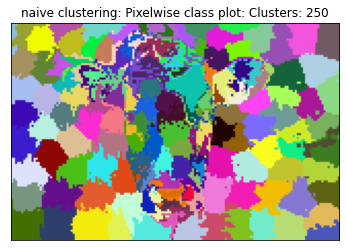

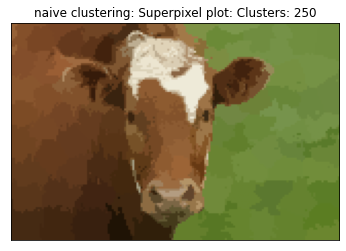

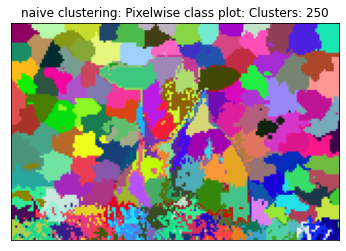

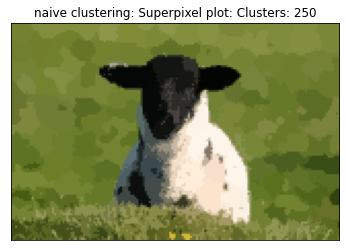

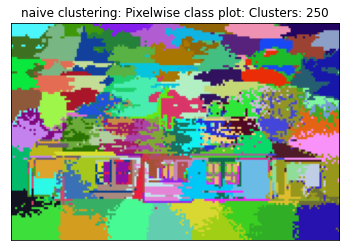

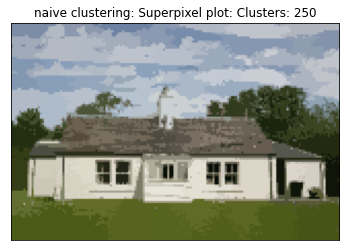

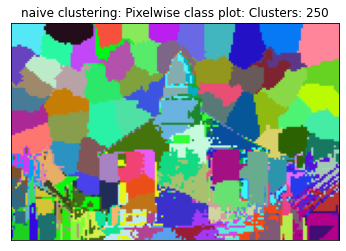

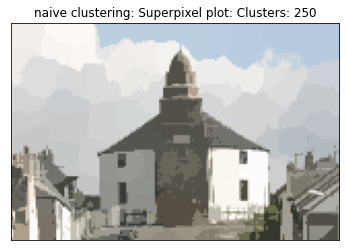

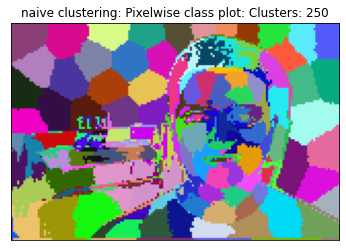

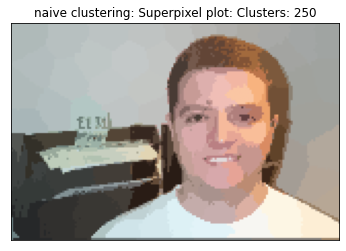

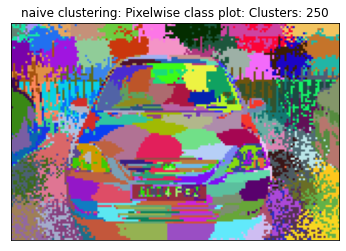

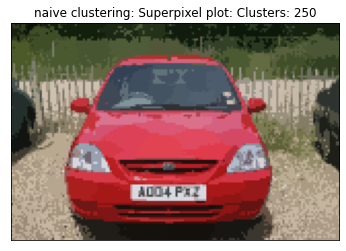

In [ ]:
# TODO: clustering r,b,g,x,y values with lambdas

import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

def preprocess(im):
    """
    Converts 3 channel image (RGB) to 5 channel image (XYRGB)
    """
    new_im = np.zeros((im.shape[0], im.shape[1], im.shape[2]+2))
    for i in range(new_im.shape[0]): 
      for j in range(new_im.shape[1]):
        new_im[i,j] = np.array([i, j, im[i,j][0], im[i,j][1], im[i,j][2]])

    return new_im


def mean_initialization(img, clusters):
      
    # Flattening it into a 2d matrix
    points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))                              
    m, n = points.shape
      
    # means is the array of assumed means or centroids. 
    means = np.zeros((clusters, n)) 
  
    # random initialization of means. 
    for i in range(clusters):
      for j in range(n):
        means[i, j] = points[np.random.randint(low=0, high=(img.shape[0] * img.shape[1]), size=1)[0], j]
  
    return points, means
  
  
# Function to measure the weighted distance
def weighted_distance(x1, y1, r1, g1, b1, x2, y2, r2, g2, b2):

    lambda1 = 0.3
    lambda2 = 1
    rgb_distance = ((r1-r2)**2 + (g1-g2)**2 + (b1-b2)**2)**0.5
    cood_distance = ((x1-x2)**2 + (y1-y2)**2)**0.5

    distance = lambda1*rgb_distance + lambda2*cood_distance
    return distance
  
# k means algorithm implementation
def k_means(points, means, clusters):

    # the number of iterations 
    iterations = 10 
    m, n = points.shape
      
    # these are the index values that correspond to the cluster to which each pixel belongs to.
    index = np.zeros(m) 
  
    # k-means algorithm.
    while(iterations > 0):
  
        for j in range(len(points)):
              
            # initialize minimum value to a large value
            minv = sys.maxsize
            temp = None
              
            for k in range(clusters):

                x1, y1, r1, g1, b1 = points[j, 0], points[j, 1], points[j, 2], points[j, 3], points[j, 4]
                x2, y2, r2, g2, b2 = means[k, 0], means[k, 1], means[k, 2], means[k, 3], means[k, 4]
                distance = weighted_distance(x1, y1, r1, g1, b1, x2, y2, r2, g2, b2)

                if(distance < minv):         
                    minv = distance
                    temp = k
                    index[j] = k 
          
        for k in range(clusters):
              
            sumx = sumy = sumr = sumg = sumb = 0
            count = 0
              
            for j in range(len(points)):
                  
                if(index[j] == k):
                    sumx += points[j, 0]
                    sumy += points[j, 1]
                    sumr += points[j, 2]
                    sumg += points[j, 3] 
                    sumb += points[j, 4]
                    count += 1
              
            if(count == 0):
                count = 1    
            
            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)
            means[k, 2] = float(sumr / count)
            means[k, 3] = float(sumg / count)
            means[k, 4] = float(sumb / count)       
              
        iterations -= 1
  
    return means, index.reshape(img.shape[0] , img.shape[1])
  
  
# main
if __name__ == '__main__':

    for org_img in im_list:
        org_img = cv2.imread(org_img)
        width = int(org_img.shape[1] * 0.5)
        height = int(org_img.shape[0] * 0.5)
        
        # resize image
        org_img = cv2.resize(org_img, (width, height), interpolation = cv2.INTER_AREA)

        # converting to 5 channel image (XYRGB)
        img = preprocess(org_img)

        # Scaling the 5 channel image with 255 (even x,y values (can scale them differently also))
        img = img/255

        # Number of clusters
        k = 250

        points, means = mean_initialization(img, k)
        means, clusters = k_means(points, means, k)
        
        # print(clusters.shape)
        _ = rgb_segment(clusters, n = k, title =  "naive clustering: Pixelwise class plot: Clusters: " + str(k),legend = False)
        superpixel_plot(org_img ,clusters, title =  "naive clustering: Superpixel plot: Clusters: "+ str(k))

### Question 5: Replicate SLIC (50 points)

It doesn't look like we have a very favourable outcome with superpixels simply being implemented. Can we do better? Have a look at the SLIC paper [here](https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/SLIC_Superpixels.pdf). Incorporate S and m and redefine your distance metric as per the paper.

**Finding an existing implementation of SLIC and using it for your assigment would be considered cheating.**

In [ ]:
############ Algorithm ############
#Compute grid steps: S
#you can explore different values of m
#initialize cluster centers [l,a,b,x,y] using  
#Perturb for minimum G
#while not converged
##for every pixel:
####  compare distance D_s with each cluster center within 2S X 2S. 
####  Assign to nearest cluster
##calculate new cluster center 

import cv2
import numpy as np
from skimage import color
import sys


def cluster_centre_initialization(im, S):
    """
    Uniform cluster centre initialization at S distance apart
    """
    # Uniform initialization of means 2d matrix with cluster centres at S distance apart
    cluster_centres = [] 

    for x in range(int(S),im.shape[0],int(S)):
        for y in range(int(S),im.shape[1],int(S)):
            cluster_centres.append([x,y])
    
    return cluster_centres

def gradient(im):
    """
    Function to calculate the gradient for LAB vector
    """

    grad = np.zeros((im.shape[0], im.shape[1]))

    for x in range(1, im.shape[0]-1):
      for y in range(1, im.shape[1]-1):
          X, Y = [], []
          for i in range(3):
              X.append(im[x+1, y, i] - im[x-1, y, i])
              Y.append(im[x, y+1, i] - im[x, y-1, i])
        
          grad[x,y] = np.linalg.norm(X) + np.linalg.norm(Y)
    
    return grad


def mean_perturbation(grad, cluster_centres):
    """
    Function to perturbate the cluster_centres to lowest gradients
    """
    for i in range(len(cluster_centres)):
       
        # indexing nearby 3*3 region
        sub_array = grad[cluster_centres[i][0]-3 : cluster_centres[i][0]+3, cluster_centres[i][1]-3 : cluster_centres[i][1]+3]
        
        # Finding min gradient
        index = np.where(sub_array==sub_array.min())

        # Assigning the cluster centre to min gradient index
        change = list(zip(index[0],index[1]))[0]
        cluster_centres[i] = [cluster_centres[i][0]-3 + change[0], cluster_centres[i][1]-3 + change[1]]

    return cluster_centres


def weighted_distance(m, S, l1, a1, b1, x1, y1, l2, a2, b2, x2, y2):
    """
    This function is used to calculate the weighted euclidean distance from lab and xy coordinates 
    """
    lab_distance = ((l1-l2)**2 + (a1-a2)**2 + (b1-b2)**2)**0.5
    cood_distance = ((x1-x2)**2 + (y1-y2)**2)**0.5

    distance = lab_distance + (m/S)*cood_distance
    return distance   


def SLIC(im, k):
    """
    Input arguments: 
    im: image input
    k: number of cluster segments


    Compute
    S: As described in the paper
    m: As described in the paper (use the same value as in the paper)
    follow the algorithm..
    
    returns:
    segmap: 2D matrix where each value corresponds to the image pixel's cluster number
    """

    # Parameter initialization
    N = im.shape[0]*im.shape[1]  # no. of pixels
    S = (N/k)**0.5               # Average length of superpixels
    m = 10                       # Parameter to assign weight to the spatial distance 

    # RGB to LAB space
    lab = color.rgb2lab(im)

    # Cluster Centre initialization
    cluster_centres = cluster_centre_initialization(lab, S)

    # Calculating gradient
    grad = gradient(lab) 

    # moving cluster centres to minimum grdient position
    cluster_centres = mean_perturbation(grad, cluster_centres)

    # SLIC algorithm
    segmap = np.zeros((im.shape[0], im.shape[1]))
    
    for i in range(10):                     # convergence loop
        # iterating over each pixel
        for x in range(im.shape[0]):        
           for y in range(im.shape[1]):

                # To find cluster centres within 2S distance 
                near_clusters = []
                for cluster in cluster_centres:
                    dist = ((x-cluster[0])**2 + (y-cluster[1])**2)**0.5
                    if dist <= 2*S:
                        near_clusters.append(cluster)

                # Finding the min distance cluster from near clusters
                if near_clusters:
                    distance_array = []
                    for cluster in near_clusters:
                        l1, a1, b1 = lab[x,y]
                        x1, y1 = x, y
                        l2, a2, b2 = lab[cluster[0], cluster[1]]
                        x2, y2 = cluster[0], cluster[1]
                        dist = weighted_distance(m, S, l1, a1, b1, x1, y1, l2, a2, b2, x2, y2)
                        distance_array.append(dist)
                    
                    min_cluster_centre = near_clusters[np.argmin(distance_array)]

                # Assigining the min_cluster_center to the current pixel
                for i in range(len(cluster_centres)):
                    if list(cluster_centres[i]) == list(min_cluster_centre):
                        segmap[x,y] = i

        # Calculating new cluster centres using assigned index values to pixels
        for index in range(len(cluster_centres)):
            chunk = np.where(segmap==index)
            if len(chunk[0])!=0:
                cluster_centres[index] = np.array([int(np.mean(chunk[0])),int(np.mean(chunk[1]))])
        
    return S, cluster_centres, lab, segmap

With SLIC implemented, plot results for all 6 images.

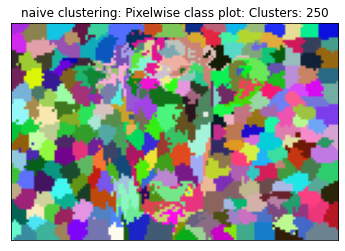

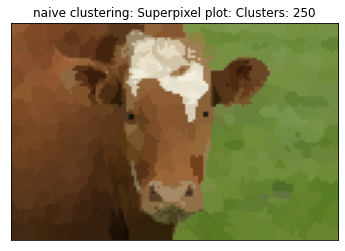

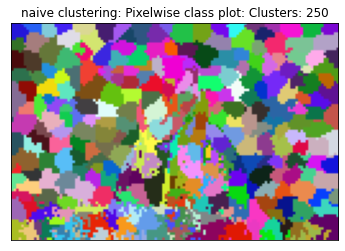

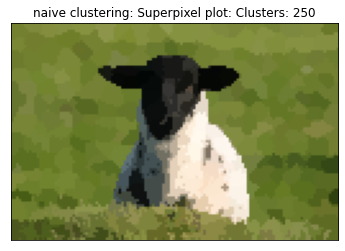

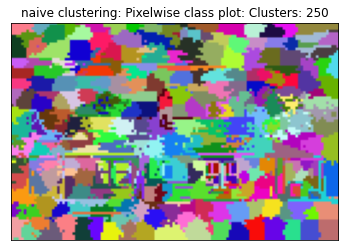

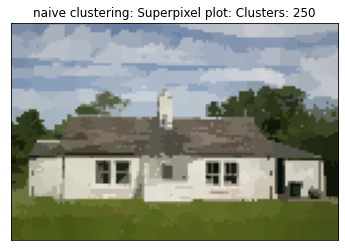

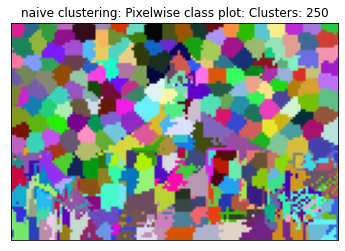

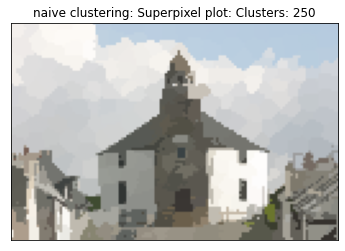

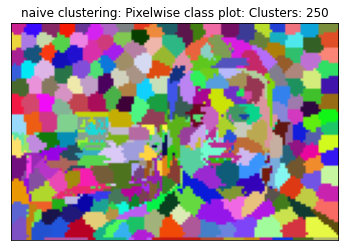

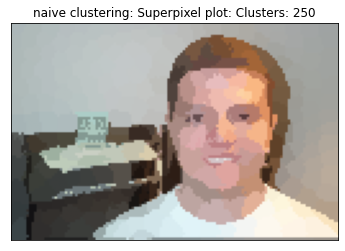

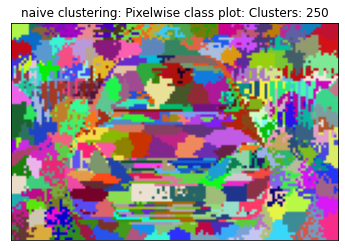

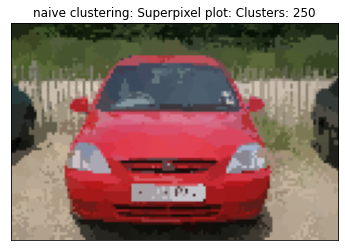

In [ ]:
## TODO: Call our plot functions with your SLIC results for all 6 images

# main
if __name__ == '__main__':
    
    image_params = []
    for org_img in im_list:
        # org_img  = im_list[0]
        org_img = cv2.imread(org_img)
        width = int(org_img.shape[1] * 0.4)
        height = int(org_img.shape[0] * 0.4)  
        org_img = cv2.resize(org_img, (width, height), interpolation = cv2.INTER_AREA)

        k = 250
        S, cluster_centres, lab, segmap = SLIC(org_img, k)
        image_params.append([org_img, S, cluster_centres, lab, segmap])
        _ = rgb_segment(segmap, n = k, title =  "naive clustering: Pixelwise class plot: Clusters: " + str(k),legend = False)
        superpixel_plot(org_img ,segmap, title =  "naive clustering: Superpixel plot: Clusters: "+ str(k))



### Bonus Question: Enforce connectivity (20 points)
There are many superpixels which are very small and disconnected from each other. Merge them with larger superpixels

O(N) algorithm:
1. Set minimum size of superpixel
2. If region smaller than threshold, assign to nearest cluster 

Plot results for the 6 images.


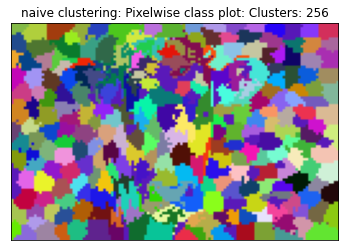

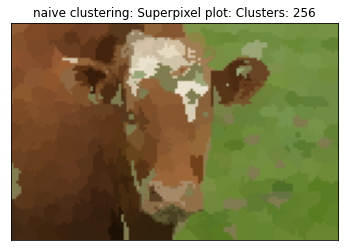

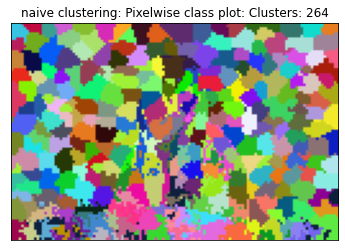

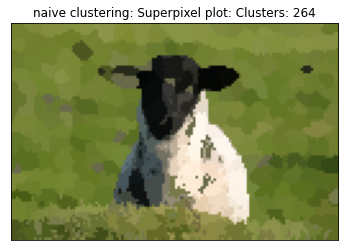

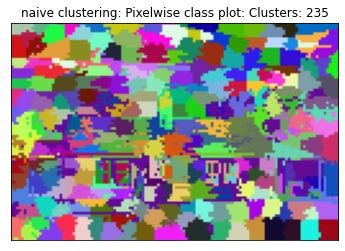

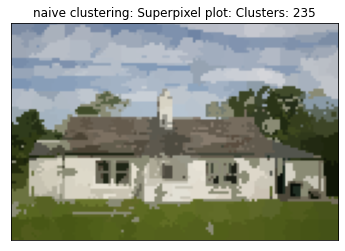

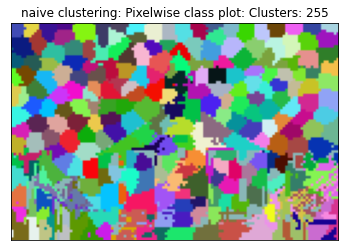

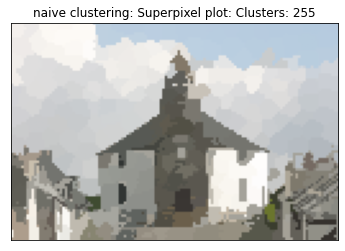

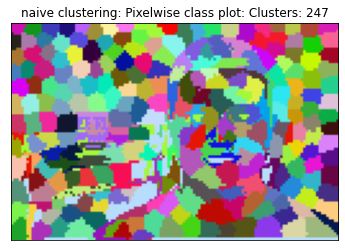

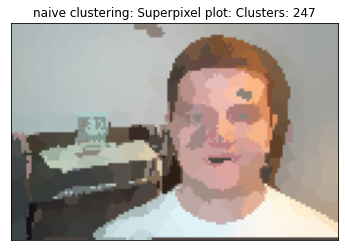

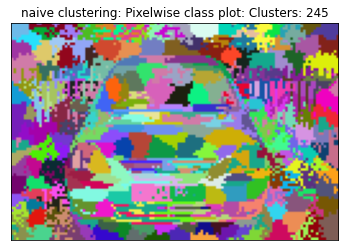

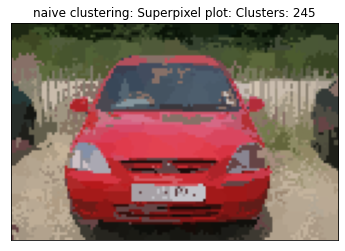

In [ ]:
# Once we get a segmap having indices for all the cluster centres we can count the pixel frequency for each cluster centre and 
# compare it with the min size of superpixel, if it is smaller we will assign it to the spatially nearest cluster ! 
# Here we use a hasharray to keep the pixel frequency for each cluster centre.

def enforce_connectivity(S, cluster_centres, lab, segmap):

    # min_superpixelarea 
    min_area = int(0.5*(S**2))    # Based on value of S(initial area)  

    # Using hashmap/hasharray - O(n) algorithm
    hasharray = np.zeros((len(cluster_centres)))

    # clusters with area less than min area
    anomalies = []

    # Replacement clusters for anomalies
    replacement = []

    # Filling the hasharray
    for x in range(segmap.shape[0]):
        for y in range(segmap.shape[1]):
            hasharray[int(segmap[x,y])] +=1
    
    # print("HA", hasharray)

    # O(n) loop for finding the anomalous superpixels
    for i in range(len(hasharray)):  
        if hasharray[i] < min_area and hasharray[i] > 0:
            anomalies.append(i)

    # print("anomalies", anomalies)

    # Fixing the anomalous cluster centres and enforcing connectivity
    min_distance = sys.maxsize
    for anomaly in anomalies:
        for i in range(len(cluster_centres)):
            if i not in anomalies:
                l1, a1, b1 = lab[cluster_centres[anomaly][0],cluster_centres[anomaly][1]]
                x1, y1 = cluster_centres[anomaly][0], cluster_centres[anomaly][1]
                l2, a2, b2 = lab[cluster_centres[i][0], cluster_centres[i][1]]
                x2, y2 = cluster_centres[i][0], cluster_centres[i][1]
                dis = weighted_distance(10, S, l1, a1, b1, x1, y1, l2, a2, b2, x2, y2)
  
                if dis < min_distance:
                    min_distance = dis
                    min_cluster = i

        replacement.append(min_cluster)

    # print("rep", replacement)

    # Segmap correction by replacing the anomalous pixels
    for x in range(segmap.shape[0]):
        for y in range(segmap.shape[1]):
            for k in range(len(anomalies)):
                if segmap[x,y] == anomalies[k]:
                    segmap[x,y] = replacement[k]

    return segmap

for image_param in image_params:
    segmap = enforce_connectivity(image_param[1], image_param[2], image_param[3], image_param[4])
    k = len(np.unique(segmap))
    _ = rgb_segment(segmap, n = k, title =  "naive clustering: Pixelwise class plot: Clusters: " + str(k),legend = False)
    superpixel_plot(image_param[0] ,segmap, title =  "naive clustering: Superpixel plot: Clusters: "+ str(k))

